In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE584'

In [4]:
data = pd.read_csv('C:\\Users\\erkai\\Downloads\\happiness_score_dataset.csv')

In [5]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data_columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']

In [7]:
data = data[data_columns].copy()

In [8]:
happy_df = data.rename({'Country':'country_name', 'Region':'region', 'Happiness Score':'happiness_score', 'Economy (GDP per Capita)':'Economy_GDP_per_Capita', 'Family':'family', 'Health (Life Expectancy)':'Health_Life_Expectancy', 'Freedom':'freedom', 'Trust (Government Corruption)':'Trust_Government_Corruption' },axis =1)

In [9]:
happy_df.head()

,country_name,region,Happiness Rank,happiness_score,Economy_GDP_per_Capita,family,Health_Life_Expectancy,freedom,Trust_Government_Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
happy_df.isnull().sum()

country_name                   0
region                         0
Happiness Rank                 0
happiness_score                0
Economy_GDP_per_Capita         0
family                         0
Health_Life_Expectancy         0
freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia Residual              0
dtype: int64

Text(0, 0.5, 'GDP per capita')

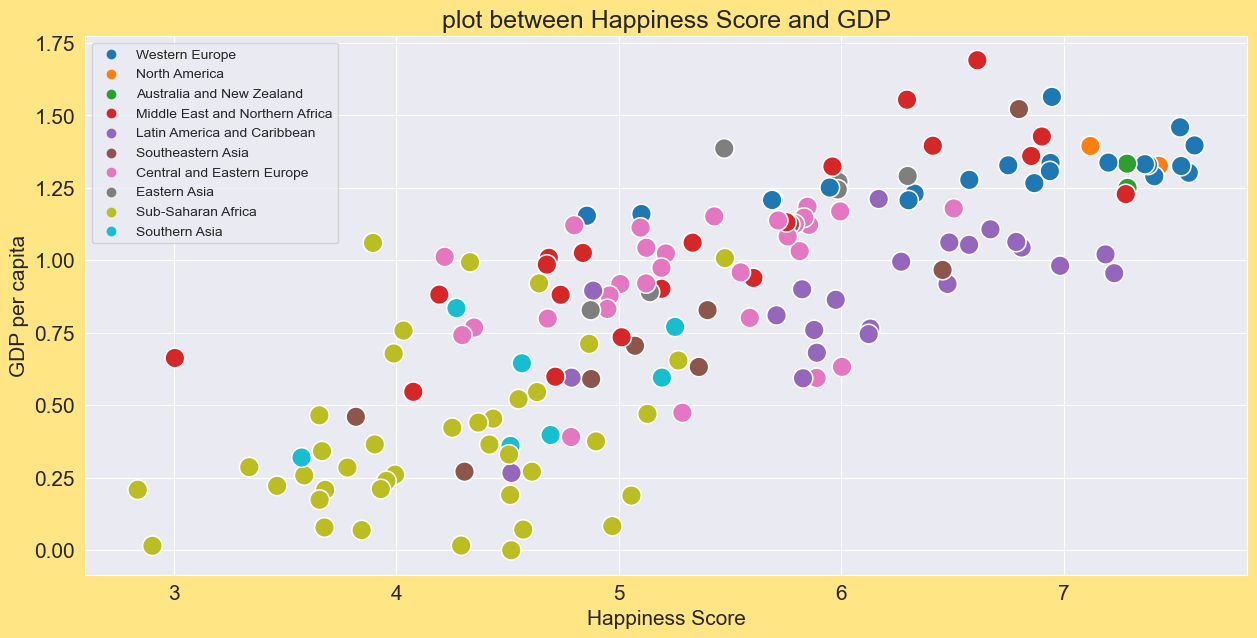

In [11]:
#Plot between happiness and GDP


plt.rcParams['figure.figsize'] = (15, 7)
plt.title('plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.Economy_GDP_per_Capita, hue = happy_df.region, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [12]:
gdp_region = happy_df.groupby('region')['Economy_GDP_per_Capita'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy_GDP_per_Capita, dtype: float64

Text(0, 0.5, '')

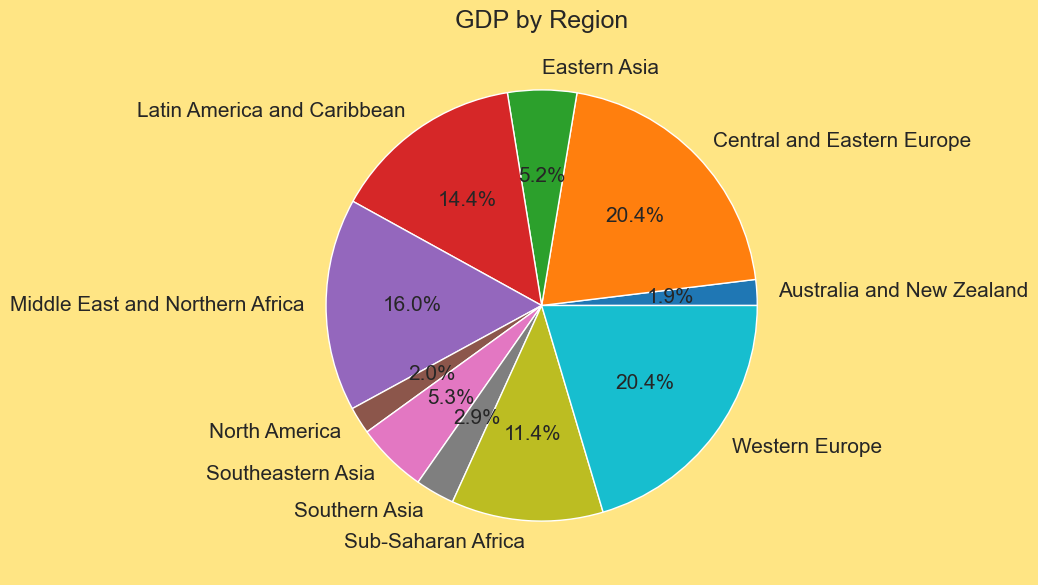

In [13]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [14]:
# total countries

total_country = happy_df.groupby('region')[['country_name']].count()
print(total_country)

                                 country_name
region                                       
Australia and New Zealand                   2
Central and Eastern Europe                 29
Eastern Asia                                6
Latin America and Caribbean                22
Middle East and Northern Africa            20
North America                               2
Southeastern Asia                           9
Southern Asia                               7
Sub-Saharan Africa                         40
Western Europe                             21


C:\Users\erkai\AppData\Local\Temp\ipykernel_24972\3963638424.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = happy_df.corr(method = "pearson")
C:\Users\erkai\AppData\Local\Temp\ipykernel_24972\3963638424.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype =np.bool),


<Axes: >

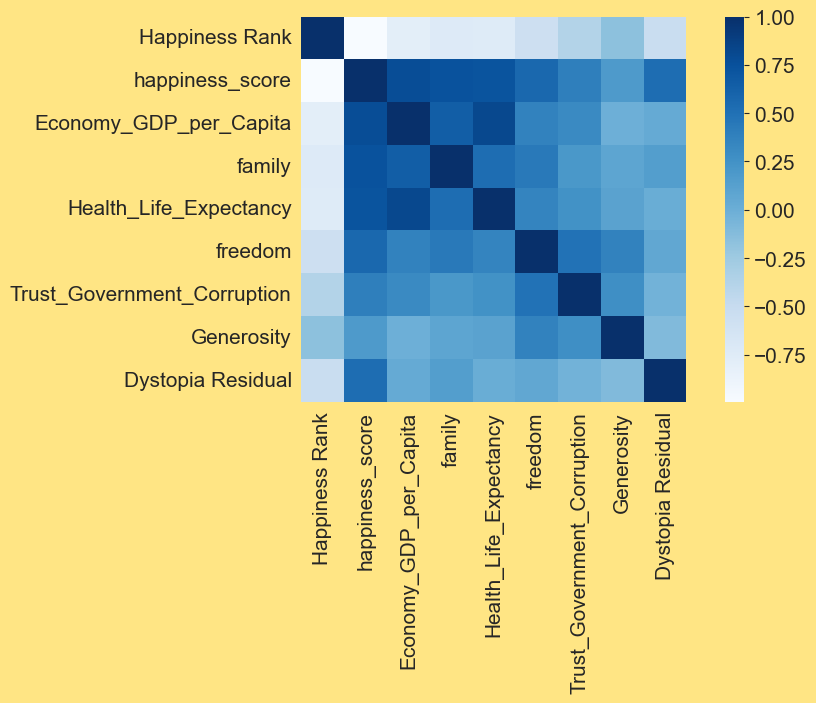

In [15]:
# Correlation Map

cor = happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype =np.bool),
            cmap= "Blues", square=True, ax=ax)

In [16]:
# Corruption in region

corruption = happy_df.groupby('region')[['Trust_Government_Corruption']].mean()
corruption

,Trust_Government_Corruption
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

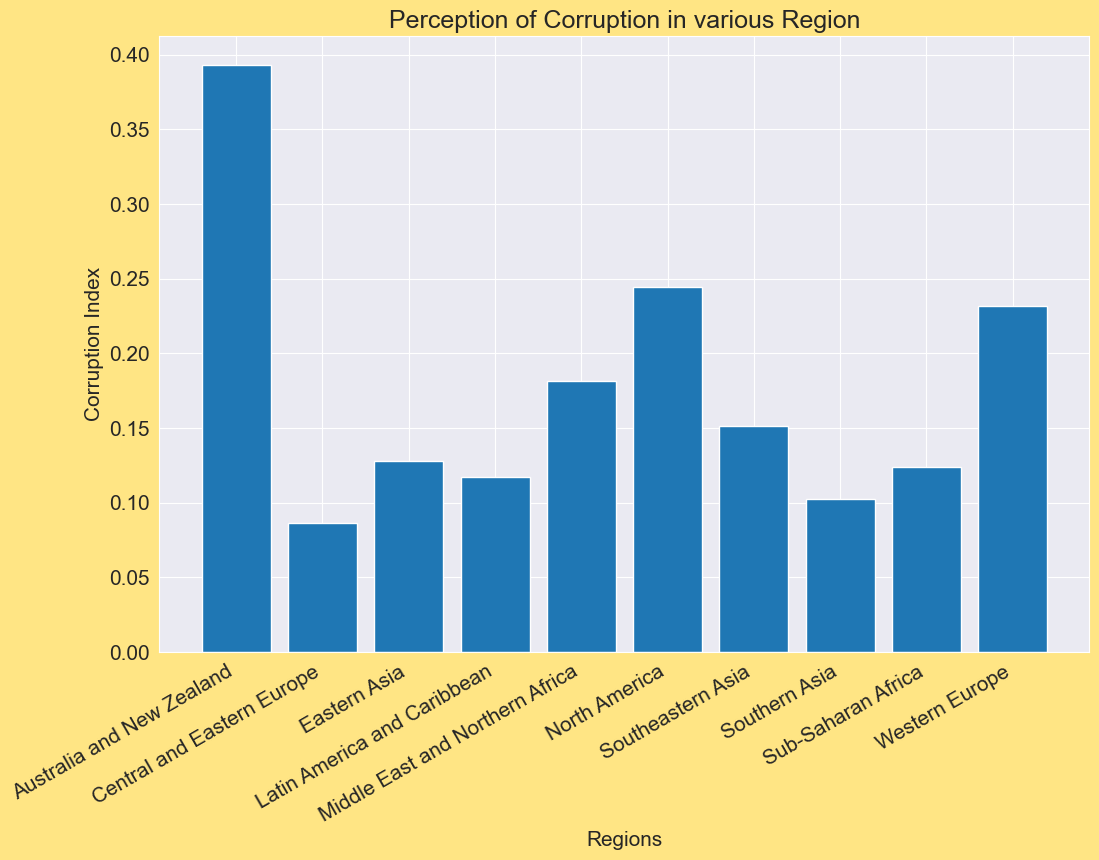

In [17]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Perception of Corruption in various Region')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.Trust_Government_Corruption)

In [18]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\erkai\AppData\Local\Temp\ipykernel_24972\970015466.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabel, rotation=45, ha='right')
C:\Users\erkai\AppData\Local\Temp\ipykernel_24972\970015466.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabel, rotation = 45, ha='right')


Text(832.0858585858584, 0.5, 'Health_Life_Expectancy')

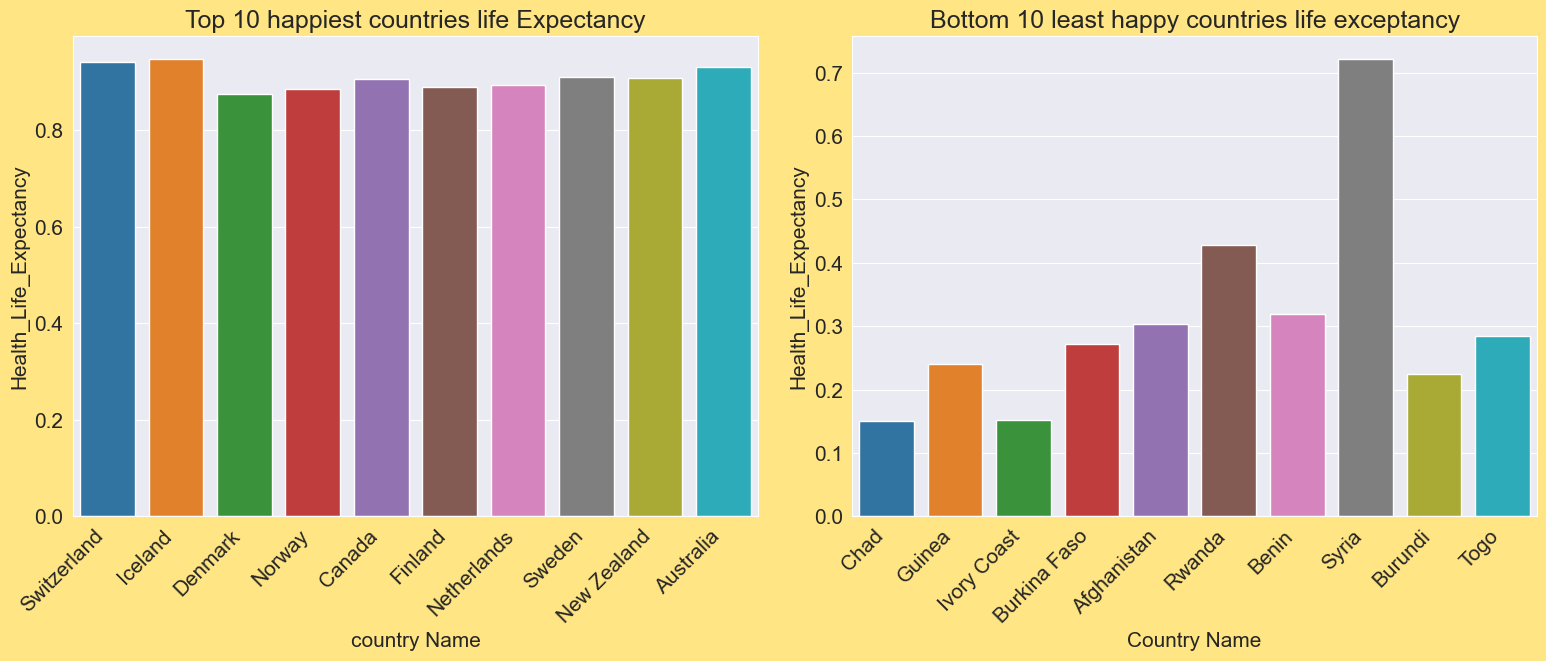

In [19]:
fig, axes = plt.subplots(1, 2, figsize= (16, 6))
plt.tight_layout(pad= 2)
xlabel = top_10.country_name
axes[0].set_title('Top 10 happiest countries life Expectancy')
axes[0].set_xticklabels(xlabel, rotation=45, ha='right')
sns.barplot(x= top_10.country_name, y=top_10.Health_Life_Expectancy, ax=axes[0])
axes[0].set_xlabel('country Name')
axes[0].set_ylabel('Health_Life_Expectancy')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries life exceptancy')
axes[1].set_xticklabels(xlabel, rotation = 45, ha='right')
sns.barplot(x= bottom_10.country_name, y= bottom_10.Health_Life_Expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Health_Life_Expectancy')

Text(0, 0.5, 'Happiness Score')

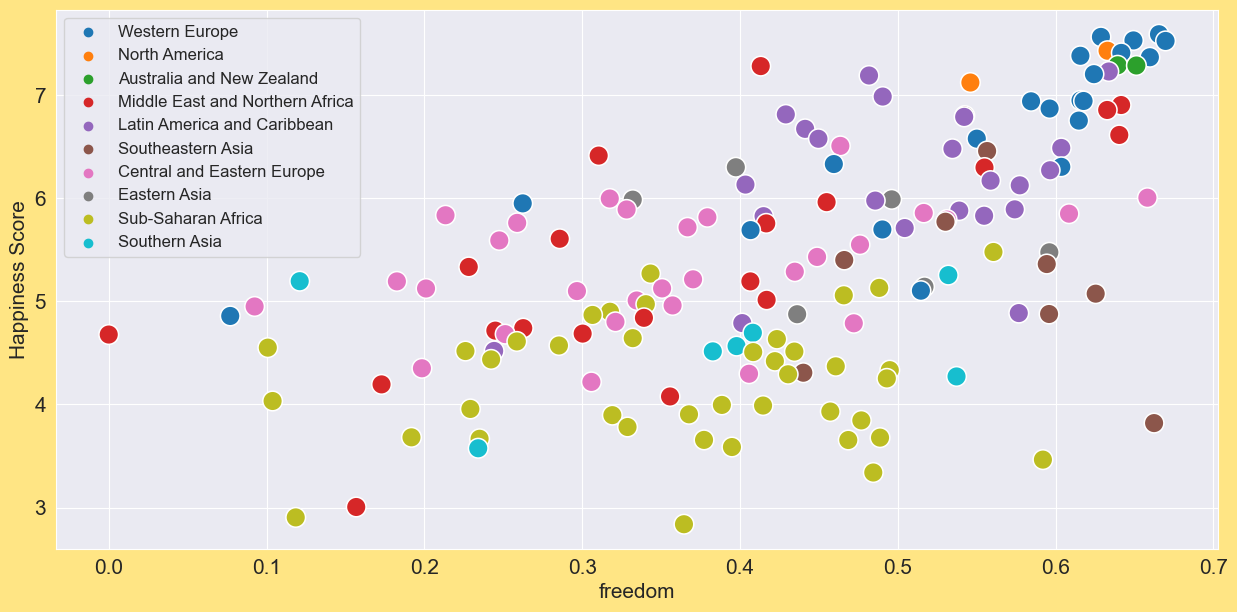

In [20]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x= happy_df.freedom, y=happy_df.happiness_score, hue= happy_df.region, s = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('freedom')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

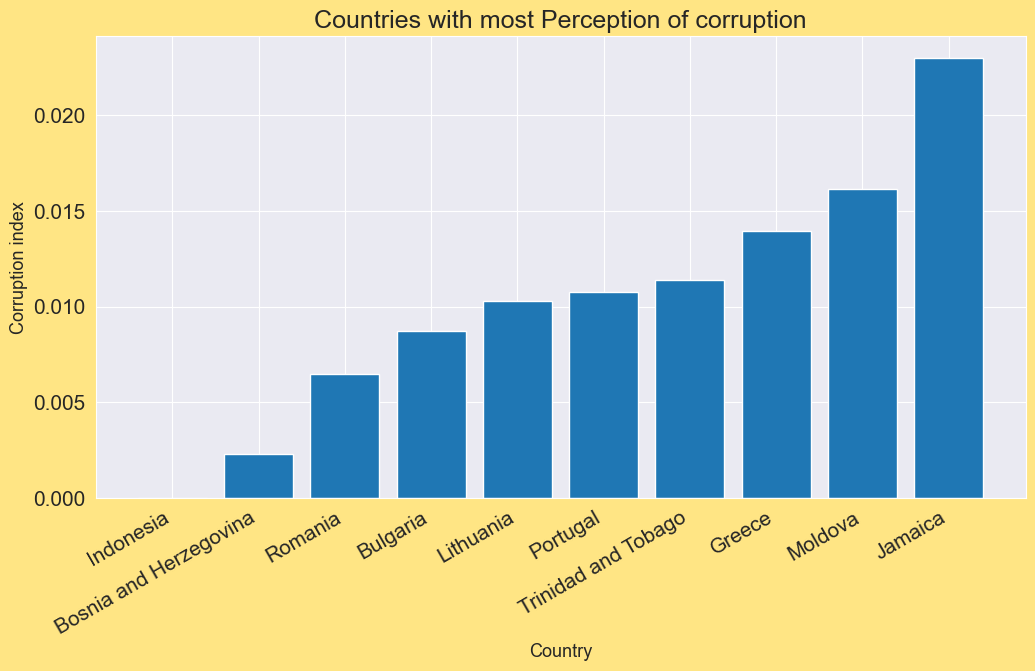

In [21]:
country = happy_df.sort_values(by= 'Trust_Government_Corruption').head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with most Perception of corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption index', fontsize= 13)
plt.xticks(rotation = 30, ha= 'right')
plt.bar(country.country_name,  country.Trust_Government_Corruption)

Text(0, 0.5, 'Corruption')

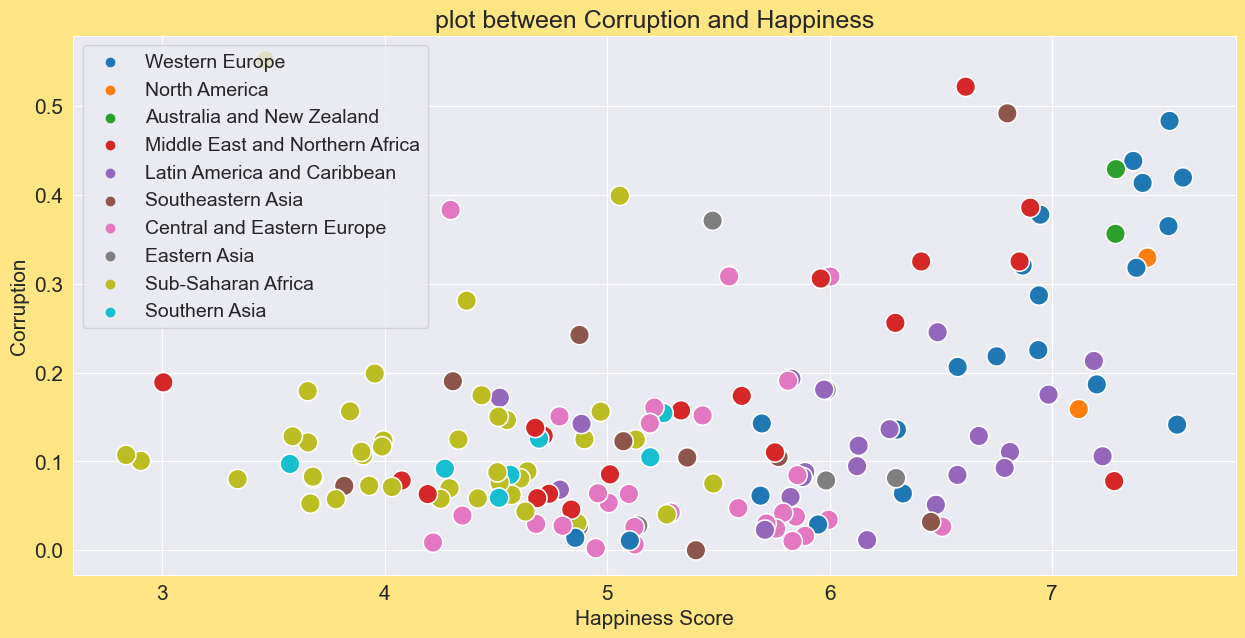

In [22]:
#corruption vs happiness

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('plot between Corruption and Happiness')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.Trust_Government_Corruption, hue = happy_df.region, s = 200);

plt.legend(loc = 'upper left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

In [23]:
#label encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
le=LabelEncoder()
happy_df['region']=le.fit_transform(happy_df['region'])
happy_df['country_name']=le.fit_transform(happy_df['country_name'])
happy_df.head()

,country_name,region,Happiness Rank,happiness_score,Economy_GDP_per_Capita,family,Health_Life_Expectancy,freedom,Trust_Government_Corruption,Generosity,Dystopia Residual
0,135,9,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


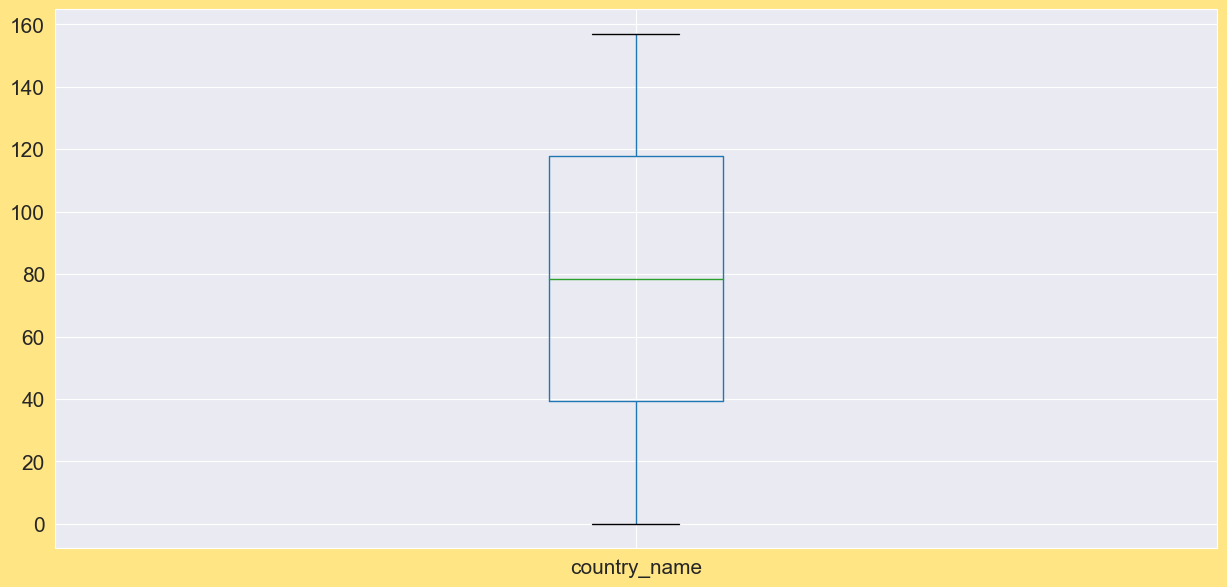

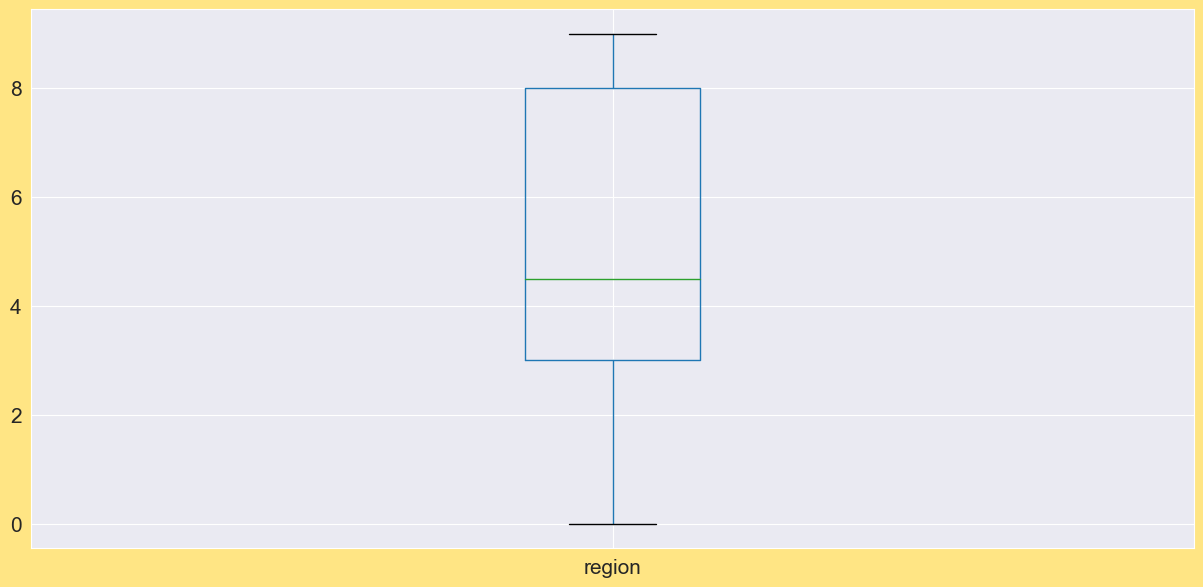

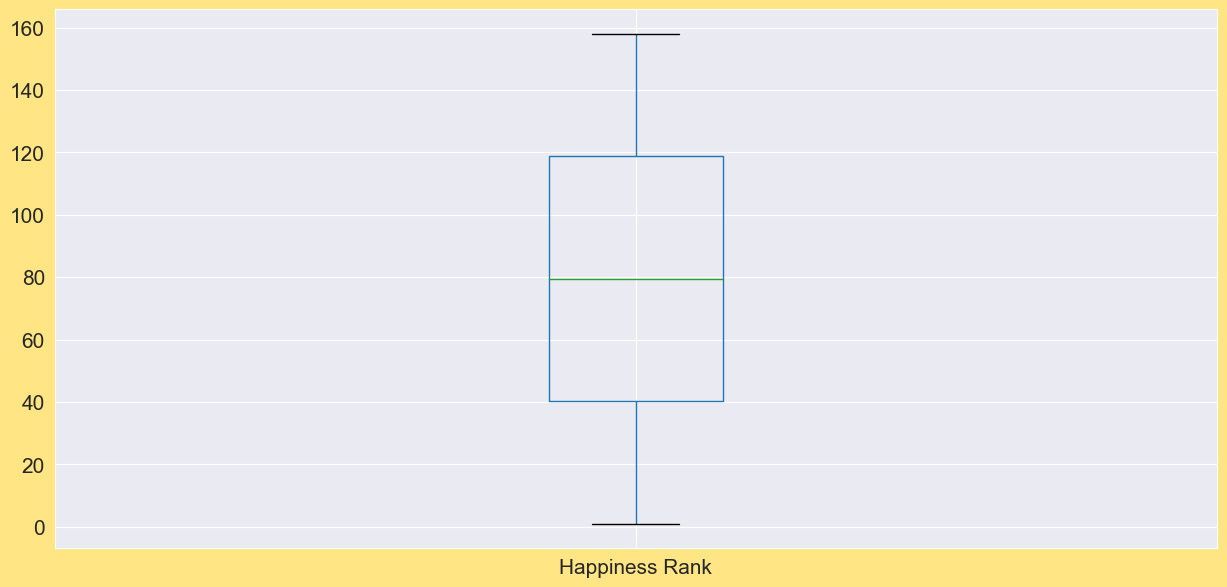

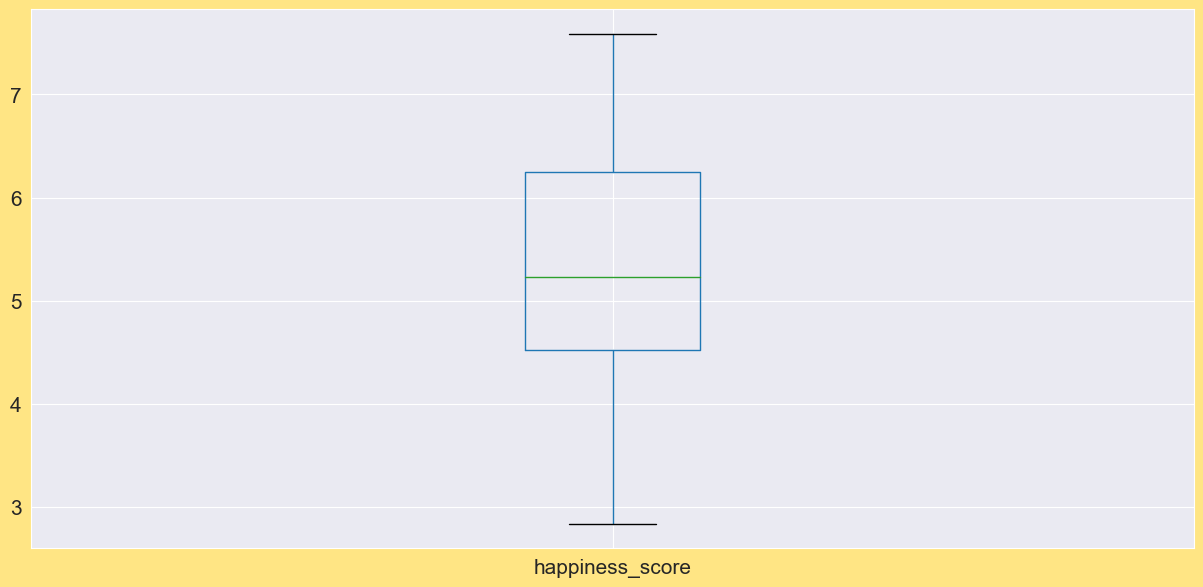

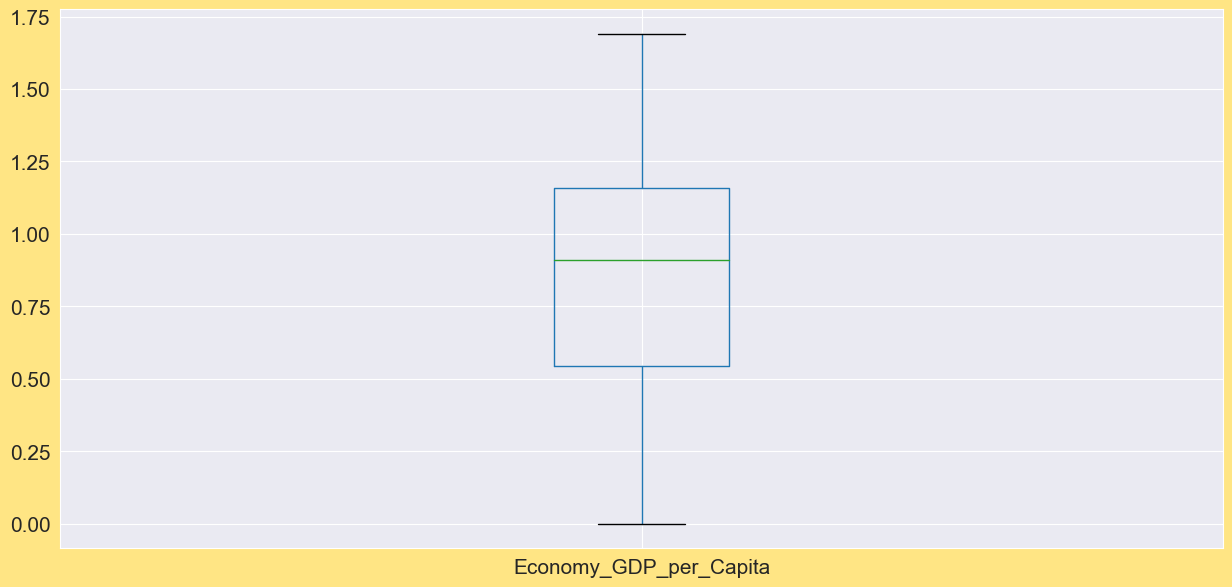

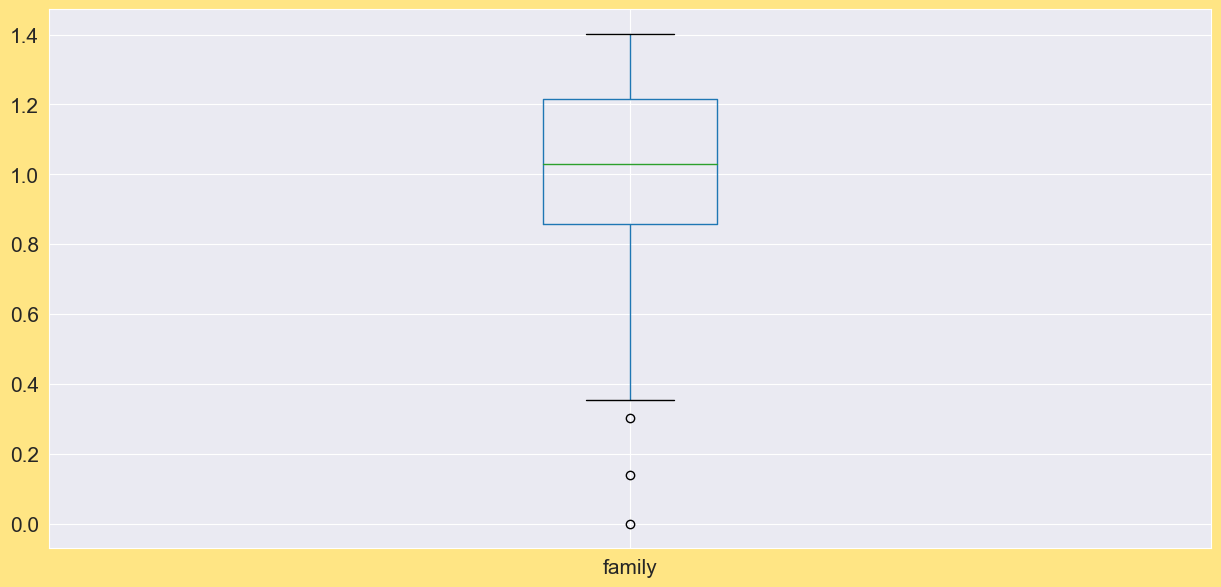

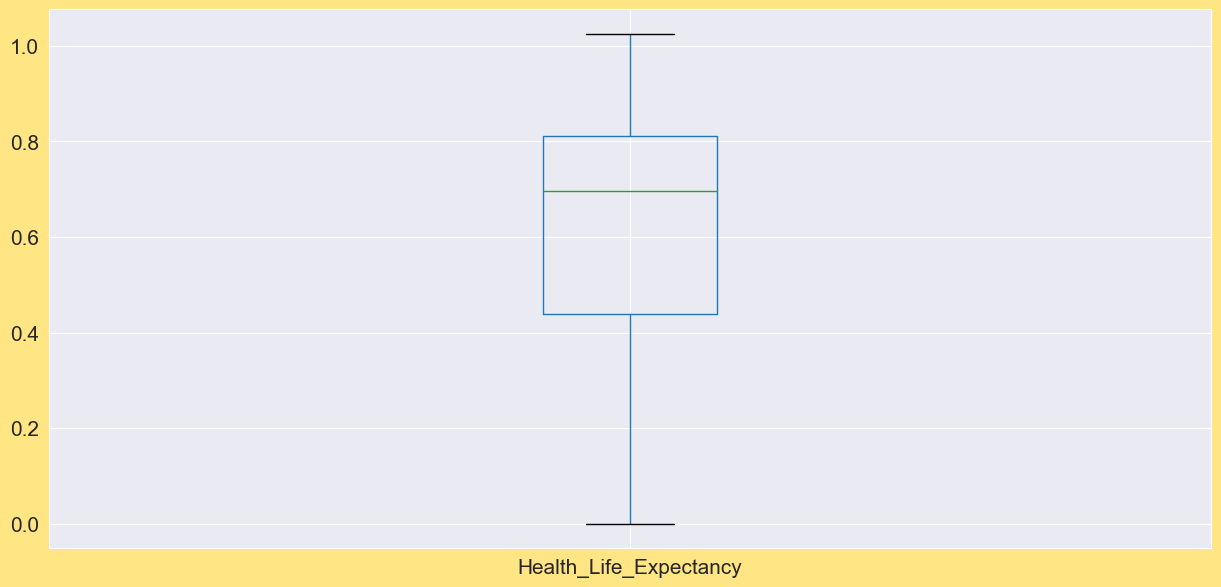

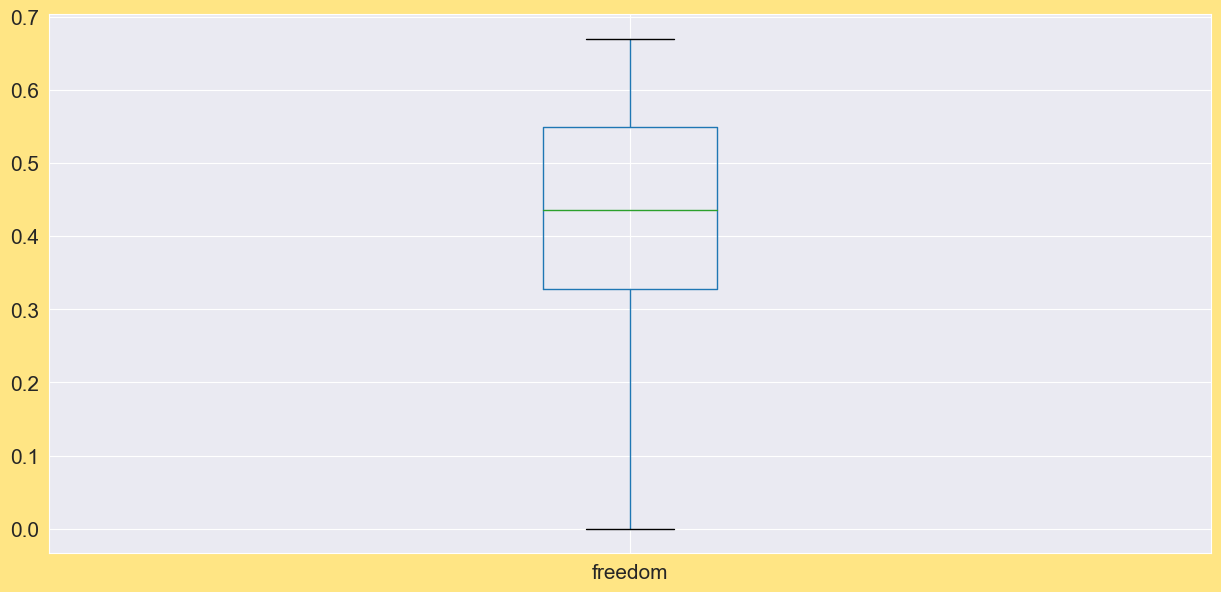

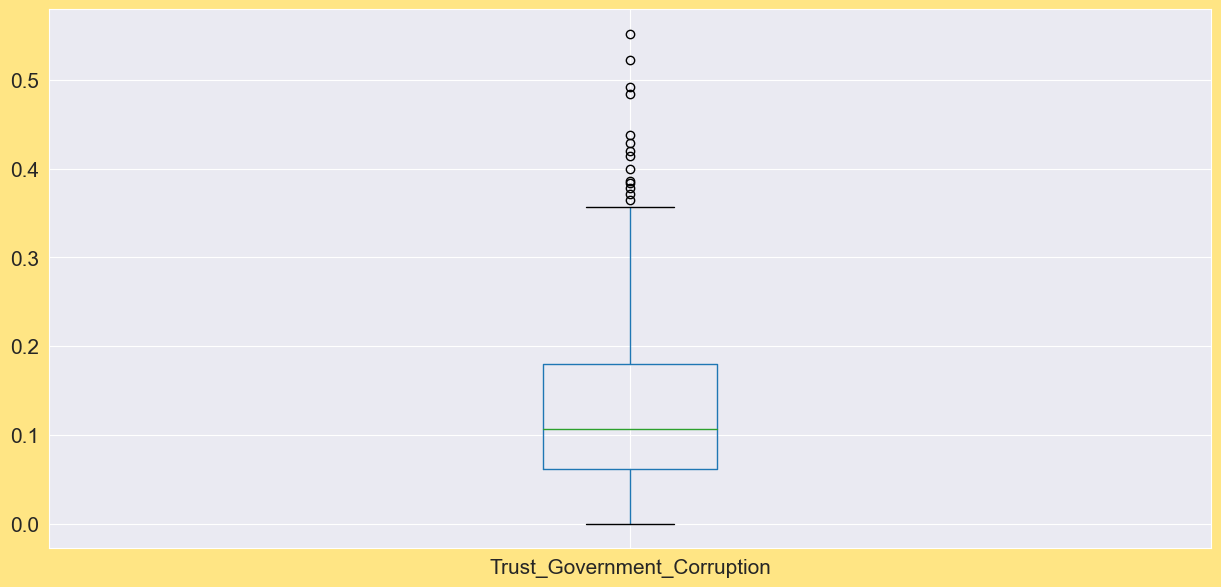

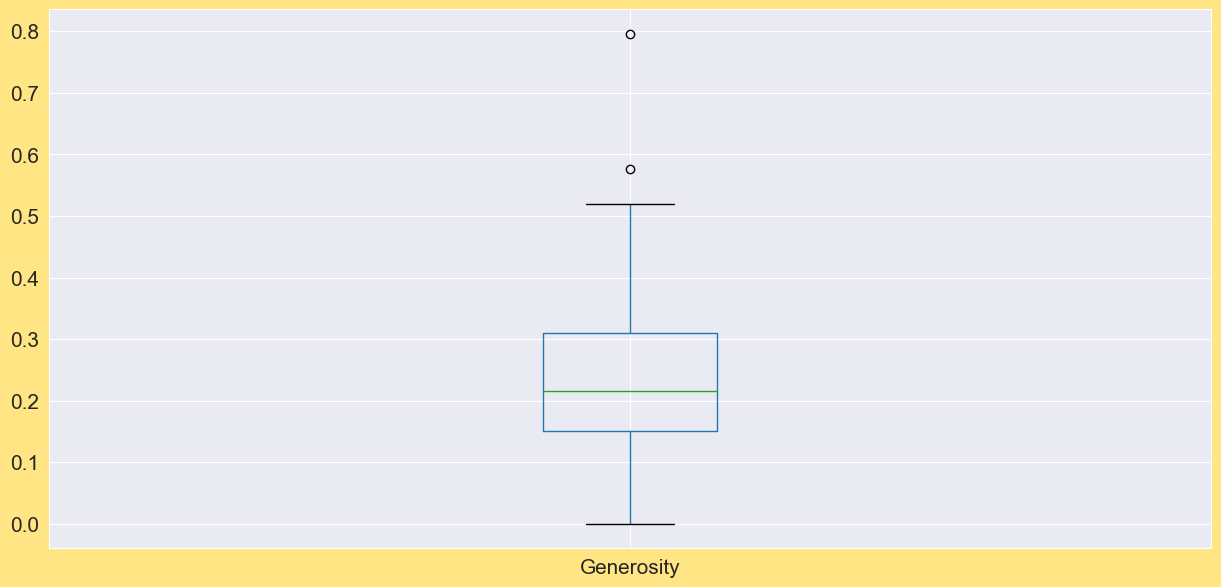

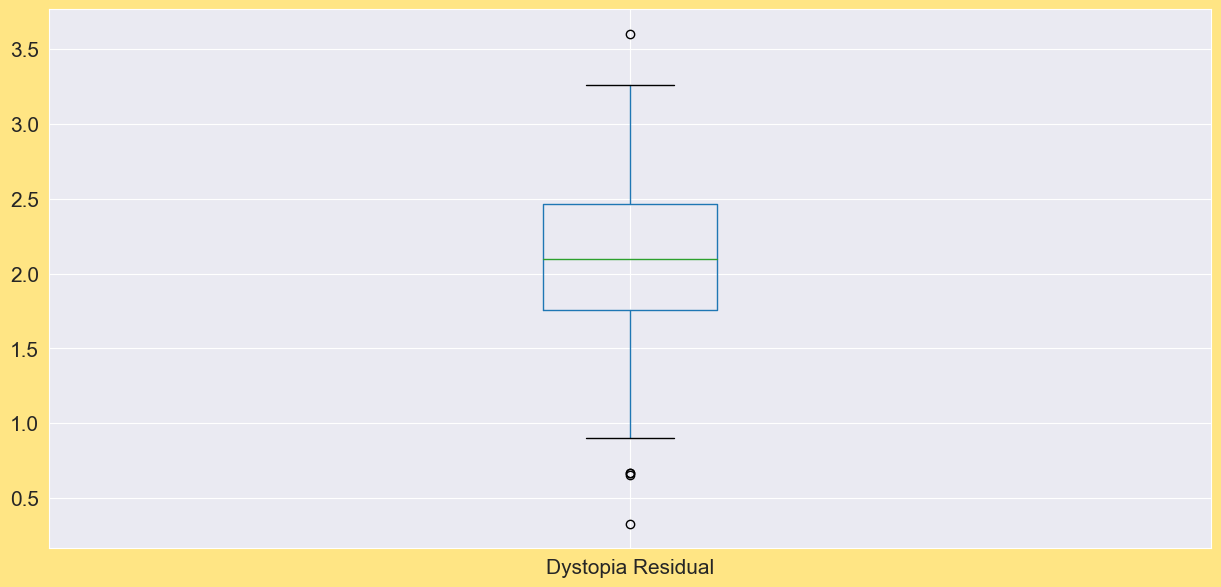

In [25]:
# Removing Outlier

for i in happy_df.columns:
    happy_df[[i]].boxplot()
    plt.show()

In [26]:
# making ML Model

x=happy_df.drop("happiness_score", axis=1)
y=happy_df['happiness_score']
x.head()

,country_name,region,Happiness Rank,Economy_GDP_per_Capita,family,Health_Life_Expectancy,freedom,Trust_Government_Corruption,Generosity,Dystopia Residual
0,135,9,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [27]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: happiness_score, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [30]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Decision Tree Model

dtr=DecisionTreeRegressor(random_state =42)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

In [33]:
#Accuracy test

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
r2_score(y_train,y_train_pred)*100

100.0

In [35]:
mean_squared_error(y_train,y_train_pred)

0.0

In [36]:
r2_score(y_test,y_test_pred)*100

98.71048155613336

In [37]:
mean_squared_error(y_test,y_test_pred)

0.01716587500000002

 # Random Forest Model

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [39]:
rtr=RandomForestRegressor(n_estimators=100,random_state=42)
rtr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_train_pred1=rtr.predict(x_train)
y_test_pred1=rtr.predict(x_test)

In [41]:
r2_score(y_train,y_train_pred1)*100

99.89170922817169

In [42]:
mean_squared_error(y_train,y_train_pred1)

0.0013827495690908835

In [43]:
#Mean Absolute Error MEA

mean_absolute_error(y_test,y_test_pred1)

0.045311041666667

In [44]:
# R2 SCORE

r2_score(y_test,y_test_pred1)*100

99.55212626252145

In [45]:
# Mean Squared Error MSE

mse=mean_squared_error(y_test,y_test_pred1)
print(mse)

0.005962027631250005


In [46]:
# Root mean squared error

rmse = sqrt(mse)
print(rmse)

0.07721416729622878


In [47]:
#Hyperparameter Tuning

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
model = RandomForestRegressor(random_state=42)
param_grid= {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)
grid_search.fit(x, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparametrs:", best_params)
print("Best Model:", best_model)

C:\Users\erkai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\erkai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\erkai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

Best Hyperparametrs: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model: RandomForestRegressor(max_features='auto', n_estimators=200, random_state=42)


In [48]:
  #Validation method
    
    
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(random_state=42)
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)

[0.72219313 0.29931052 0.28169147 0.21328882 0.71810764]


In [49]:
# XG Boost Model

xg_reg=xgb.XGBRegressor()

In [50]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_train_pred2=xg_reg.predict(x_train)
y_test_pred2=xg_reg.predict(x_test)

In [52]:
r2_score(y_train,y_train_pred2)*100

99.99996077462919

In [53]:
mean_squared_error(y_train,y_train_pred2)

5.008632193017226e-07

In [54]:
r2_score(y_test,y_test_pred2)*100

99.51783732875049

In [55]:
mean_squared_error(y_test,y_test_pred2)

0.006418476745099671

In [56]:
## Linear Regression

reg=LinearRegression()

In [57]:
reg.fit(x_train,y_train)

LinearRegression()

In [58]:
y_train_pred3=reg.predict(x_train)
y_test_pred3=reg.predict(x_test)

In [59]:
r2_score(y_train,y_train_pred3)*100

99.99999424325857

In [60]:
mean_squared_error(y_train,y_train_pred3)

7.350701806862086e-08

In [61]:
r2_score(y_test,y_test_pred3)*100

99.99999425394756

In [62]:
mean_squared_error(y_test,y_test_pred3)

7.649058322467269e-08

From considering all the various type of the models Random Forest is doing pretty well.